In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\2361962758.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

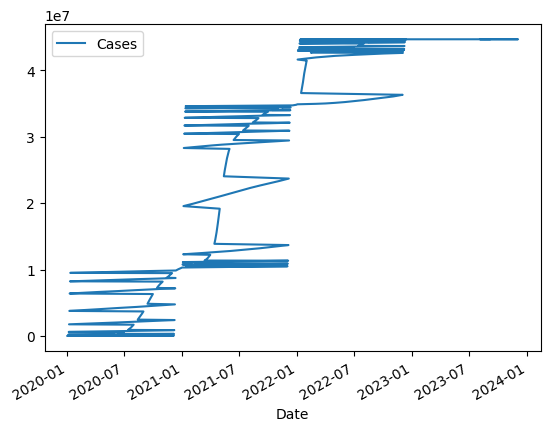

In [321]:
df.plot()

In [322]:
dfr=df.resample('D').ffill()

In [323]:
dfr.head()

,Cases
Date,
2020-01-02,1
2020-01-03,3
2020-01-04,1998
2020-01-05,37257
2020-01-06,198370


In [324]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

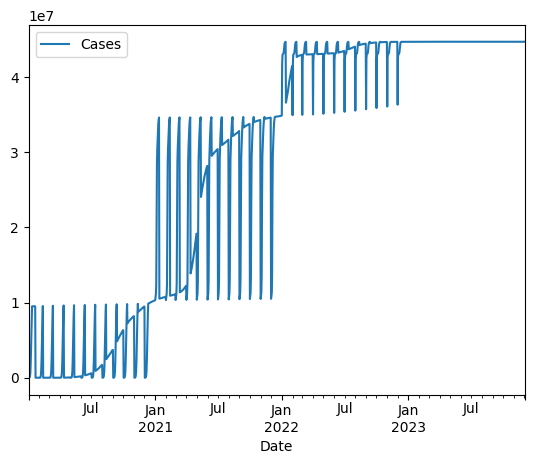

In [325]:
dfr.plot()

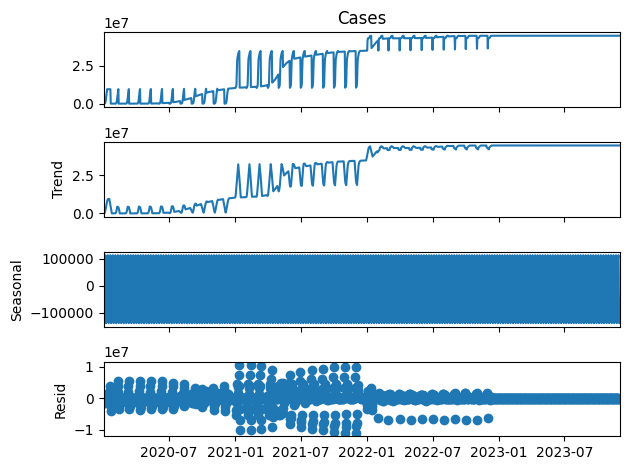

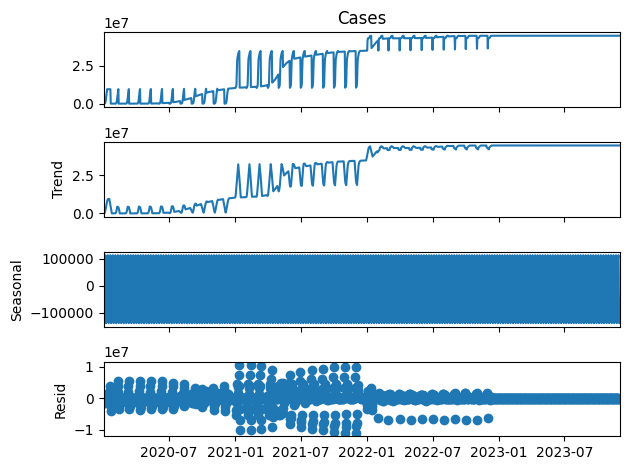

In [326]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [327]:
len(dfr)

1431

In [328]:
80*1431

114480

In [329]:
0.8*1431

1144.8

In [330]:
# train = dfr.iloc[:1144]
# test = dfr.iloc[1144:]
     

In [331]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [332]:
# dfr.head(),dfr.tail()

In [333]:
def scaleandpreparedata(dfr):
    n=len(dfr)
    p=int(n*0.8)
    train=dfr.iloc[:p]
    test=dfr.iloc[p:]

    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return (scaled_train,scaled_test,test,scaler)

In [334]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [335]:
# n_input = 12
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)

     

In [336]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [337]:
# define model
def createModelandTrainModel(scaled_train,n_input,n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')


    # n_input = 12
    # n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)
    model.fit(generator,epochs=100)
    return model



In [338]:
# model.summary()

In [339]:
# model.fit(generator,epochs=100)

In [340]:
# last_train_batch = scaled_train[-12:]

In [341]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [342]:
# model.predict(last_train_batch)

In [343]:
# scaled_test[0]

In [344]:
def functionforprediction(dfr,n_input):
    n_features=1
    test_predictions = []
    (scaled_train,scaled_test,testp,scaler)=scaleandpreparedata(dfr)
    model=createModelandTrainModel(scaled_train,n_input,n_features)
    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    return (true_predictions,testp)

In [345]:
(true_predictions,test)=functionforprediction(dfr,12)

Epoch 1/100


C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4660
Epoch 2/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2287

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0800
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135
Epoch 16/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 
Epoch 17/100
3

In [346]:
# test.head()

In [347]:
# test_predictions

In [348]:

test['Predictions'] = true_predictions.astype(int)


C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\1949176711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [349]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,44686263,44795402
2023-02-20,44686358,44861018
2023-02-21,44686483,44908111
2023-02-22,44686676,44943367
2023-02-23,44686842,44972667


<Axes: xlabel='Date'>

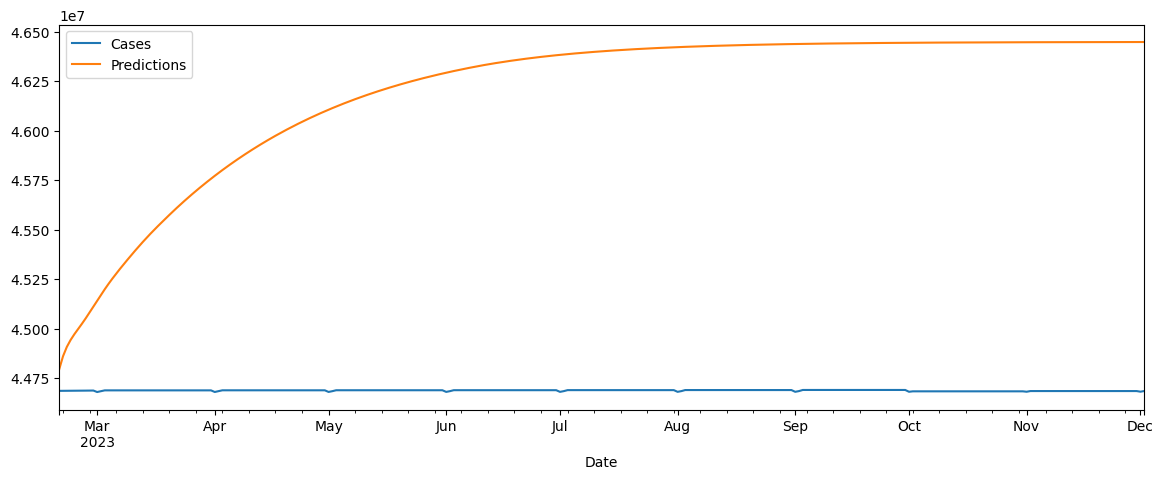

In [350]:
test.plot(figsize=(14,5))

In [351]:
testm=test.resample('M').sum()

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

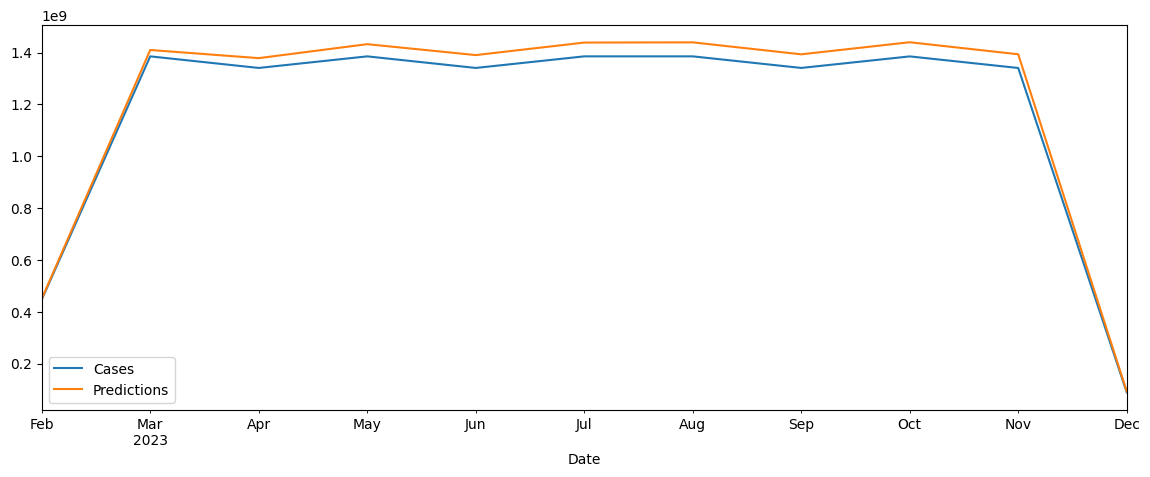

In [352]:
testm.plot(figsize=(14,5))

In [361]:
def scaledata(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled_train = scaler.transform(data)
    return (scaled_train,scaler)



def trainmodelondata(input):
    n_input = 12
    n_features = 1
    data=pd.DataFrame(input)
    test_predictions = []
    (scaled_data,scaler)=scaledata(data)
    model=createModelandTrainModel(scaled_data,n_input,n_features)
    first_eval_batch = scaled_data[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(143):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions).astype(int)
    return true_predictions




    


In [362]:
testi=dfr.iloc[1141:]
tp=trainmodelondata(testi)

Epoch 1/100


C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6335
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5864
Epoch 3/100


C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3481
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1370 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0527
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0290
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0358
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0313
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0392
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0300
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0299 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0318
Epoch 16/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0362
Epoch 17/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0363
Epoch 18/100
9/9 ━━━━━━━━━━━━━━━━

In [364]:
tp.astype(int)

array([[44685546],
       [44685665],
       [44685756],
       [44685799],
       [44685814],
       [44685804],
       [44685790],
       [44685765],
       [44685732],
       [44685694],
       [44685648],
       [44685545],
       [44685490],
       [44685445],
       [44685400],
       [44685354],
       [44685309],
       [44685265],
       [44685223],
       [44685184],
       [44685147],
       [44685113],
       [44685080],
       [44685050],
       [44685021],
       [44684993],
       [44684967],
       [44684943],
       [44684920],
       [44684898],
       [44684879],
       [44684860],
       [44684843],
       [44684826],
       [44684811],
       [44684797],
       [44684784],
       [44684772],
       [44684760],
       [44684749],
       [44684739],
       [44684730],
       [44684721],
       [44684712],
       [44684705],
       [44684697],
       [44684691],
       [44684684],
       [44684678],
       [44684673],
       [44684668],
       [44684663],
       [4468

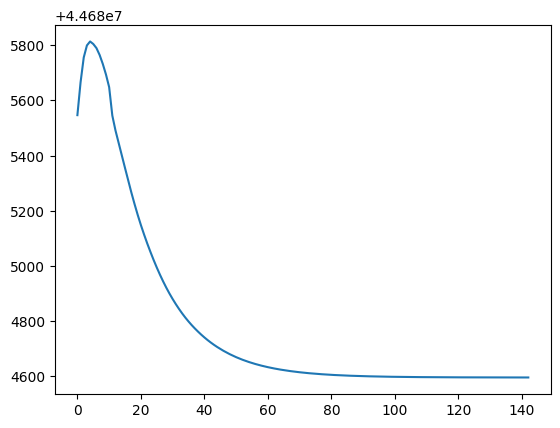

In [366]:
plt.plot(tp)
